# Singapore Public Housing (HDB) Resale Price Prediction Model (Part 7)
### EDA and Modelling

## 1. Initialization

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

pd.set_option('max_columns', 99)

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
# Neural Network


In [11]:
hdb = pd.read_csv('./Dataset/final_data.csv')

In [12]:
hdb[:10]

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,sold_year,sold_month,address,latitude,longitude,raffles_place_dist,one_north_dist,jurong_east_dist,orchard_dist,changi_dist,raffles_place_drive,one_north_drive,jurong_east_drive,orchard_drive,changi_drive,mrt_dist,near_bus_itc,near_mrt_itc,mrt_station,bus_u300m,bus_dist,mall_u1km,mall_dist,pri_u1km,pri_u2km,pri_aff_u1km,pri_aff_u2km,pri_elite_u1km,pri_elite_u2km,sec_u1km,sec_u2km,sec_aff_u1km,sec_aff_u2km,sec_elite_u1km,sec_elite_u2km
0,ANG MO KIO,2 ROOM,11,44.0,Improved,1979,61.33,232000.0,2017,1,406 ANG MO KIO AVE 10,1.362005,103.853880,25.17,35.18,47.60,21.13,46.20,18.80,26.20,29.93,15.25,32.25,938.0,0.0,0.0,Ang Mo Kio,5.0,91.0,0.0,1003.0,2.0,11.0,0.0,1.0,0.0,1.0,1.0,10.0,0.0,1.0,0.0,2.0
1,ANG MO KIO,3 ROOM,2,67.0,New Generation,1978,60.58,250000.0,2017,1,108 ANG MO KIO AVE 4,1.370966,103.838202,31.97,42.38,61.63,27.93,53.00,20.25,24.30,28.03,16.72,33.72,1315.0,0.0,0.0,Ang Mo Kio,5.0,166.0,1.0,870.0,3.0,8.0,1.0,2.0,1.0,2.0,5.0,12.0,1.0,2.0,2.0,4.0
2,ANG MO KIO,3 ROOM,2,67.0,New Generation,1980,62.42,262000.0,2017,1,602 ANG MO KIO AVE 5,1.380709,103.835368,33.15,44.85,64.58,29.12,61.28,23.13,27.08,30.82,19.63,36.63,1041.0,0.0,0.0,Yio Chu Kang,4.0,129.0,0.0,1530.0,3.0,4.0,1.0,1.0,1.0,1.0,4.0,8.0,1.0,1.0,2.0,2.0
3,ANG MO KIO,3 ROOM,5,68.0,New Generation,1980,62.08,265000.0,2017,1,465 ANG MO KIO AVE 10,1.366201,103.857201,28.65,35.95,48.10,24.62,46.57,18.25,25.70,29.43,14.72,31.70,885.0,0.0,0.0,Ang Mo Kio,2.0,69.0,1.0,879.0,3.0,9.0,0.0,1.0,0.0,1.0,1.0,8.0,0.0,1.0,0.0,2.0
4,ANG MO KIO,3 ROOM,2,67.0,New Generation,1980,62.42,265000.0,2017,1,601 ANG MO KIO AVE 5,1.381041,103.835132,33.80,45.50,65.23,29.77,60.55,23.17,27.12,30.85,18.77,35.32,1063.0,0.0,0.0,Yio Chu Kang,4.0,149.0,0.0,1574.0,2.0,4.0,1.0,1.0,1.0,1.0,4.0,8.0,1.0,1.0,2.0,2.0
5,ANG MO KIO,3 ROOM,2,68.0,New Generation,1981,63.00,275000.0,2017,1,150 ANG MO KIO AVE 5,1.376807,103.842018,34.72,40.47,52.88,30.68,55.97,21.82,26.23,29.97,16.58,33.58,643.0,0.0,0.0,Yio Chu Kang,6.0,91.0,1.0,697.0,4.0,6.0,1.0,1.0,1.0,1.0,4.0,9.0,1.0,1.0,2.0,2.0
6,ANG MO KIO,3 ROOM,5,68.0,New Generation,1979,61.50,280000.0,2017,1,447 ANG MO KIO AVE 10,1.367479,103.855967,28.33,38.02,50.17,24.30,48.63,18.77,25.60,29.33,15.23,32.23,705.0,0.0,0.0,Ang Mo Kio,4.0,140.0,1.0,856.0,3.0,9.0,0.0,1.0,0.0,1.0,2.0,10.0,0.0,1.0,0.0,2.0
7,ANG MO KIO,3 ROOM,5,67.0,New Generation,1976,58.33,285000.0,2017,1,218 ANG MO KIO AVE 1,1.365119,103.841743,28.07,38.80,50.95,24.03,49.42,18.83,22.65,26.38,15.28,32.28,1031.0,0.0,0.0,Ang Mo Kio,4.0,132.0,2.0,876.0,1.0,8.0,0.0,2.0,0.0,2.0,2.0,12.0,0.0,2.0,0.0,4.0
8,ANG MO KIO,3 ROOM,5,68.0,New Generation,1979,61.50,285000.0,2017,1,447 ANG MO KIO AVE 10,1.367479,103.855967,28.33,38.02,50.17,24.30,48.63,18.77,25.60,29.33,15.23,32.23,705.0,0.0,0.0,Ang Mo Kio,4.0,140.0,1.0,856.0,3.0,9.0,0.0,1.0,0.0,1.0,2.0,10.0,0.0,1.0,0.0,2.0
9,ANG MO KIO,3 ROOM,2,67.0,New Generation,1979,61.33,285000.0,2017,1,571 ANG MO KIO AVE 3,1.370055,103.854881,27.18,37.60,54.23,23.15,57.90,17.78,26.07,29.57,14.23,31.23,553.0,0.0,0.0,Ang Mo Kio,8.0,101.0,1.0,719.0,2.0,7.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0


In [55]:
hdb.sample(5)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,sold_year,sold_month,address,latitude,longitude,raffles_place_dist,one_north_dist,jurong_east_dist,orchard_dist,changi_dist,raffles_place_drive,one_north_drive,jurong_east_drive,orchard_drive,changi_drive,mrt_dist,near_bus_itc,near_mrt_itc,mrt_station,bus_u300m,bus_dist,mall_u1km,mall_dist,pri_u1km,pri_u2km,pri_aff_u1km,pri_aff_u2km,pri_elite_u1km,pri_elite_u2km,sec_u1km,sec_u2km,sec_aff_u1km,sec_aff_u2km,sec_elite_u1km,sec_elite_u2km
5822,WOODLANDS,4 ROOM,14,94.0,Premium Apartment,2003,84.83,390000.0,2017,4,686A WOODLANDS DR 73,1.442136,103.805620,48.33,56.92,35.88,44.30,69.35,35.13,36.02,31.07,31.60,41.33,552.0,0.0,0.0,Admiralty,7.0,63.0,2.0,494.0,3.0,12.0,0.0,0.0,1.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0
45544,BUKIT MERAH,4 ROOM,17,75.0,Model A,2002,82.75,685000.0,2019,3,18 CANTONMENT CL,1.273901,103.839417,10.87,33.02,35.53,26.95,44.00,6.08,15.97,24.37,12.73,30.05,860.0,0.0,0.0,Outram Park,7.0,114.0,2.0,457.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
37303,CHOA CHU KANG,4 ROOM,8,113.0,Premium Apartment,1998,78.25,420000.0,2018,10,634 CHOA CHU KANG NTH 6,1.396609,103.749729,43.70,35.68,21.05,56.13,77.35,34.38,30.08,17.30,26.97,46.50,278.0,0.0,0.0,Yew Tee,5.0,39.0,3.0,334.0,4.0,8.0,0.0,0.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0
69137,PASIR RIS,4 ROOM,5,111.0,Model A,1989,68.25,418000.0,2020,3,114 PASIR RIS ST 11,1.368451,103.954961,41.02,63.80,74.27,50.55,26.22,30.95,39.35,41.52,27.88,15.15,793.0,0.0,0.0,Pasir Ris,5.0,71.0,1.0,727.0,3.0,9.0,0.0,0.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,0.0
3224,MARINE PARADE,3 ROOM,8,65.0,Improved,1975,57.17,385000.0,2017,3,31 MARINE CRES,1.303706,103.911445,32.42,53.98,66.60,40.98,37.95,14.98,25.88,32.22,18.08,17.55,1923.0,0.0,0.0,Kembangan,5.0,115.0,5.0,722.0,2.0,5.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,0.0,1.0


In [56]:
hdb['sold_year'] = hdb['sold_year'] - 2016

In [57]:
hdb.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'remaining_lease', 'resale_price', 'sold_year',
       'sold_month', 'address', 'latitude', 'longitude', 'raffles_place_dist',
       'one_north_dist', 'jurong_east_dist', 'orchard_dist', 'changi_dist',
       'raffles_place_drive', 'one_north_drive', 'jurong_east_drive',
       'orchard_drive', 'changi_drive', 'mrt_dist', 'near_bus_itc',
       'near_mrt_itc', 'mrt_station', 'bus_u300m', 'bus_dist', 'mall_u1km',
       'mall_dist', 'pri_u1km', 'pri_u2km', 'pri_aff_u1km', 'pri_aff_u2km',
       'pri_elite_u1km', 'pri_elite_u2km', 'sec_u1km', 'sec_u2km',
       'sec_aff_u1km', 'sec_aff_u2km', 'sec_elite_u1km', 'sec_elite_u2km'],
      dtype='object')

In [58]:
hdb.drop(['address', 'flat_model', 'latitude', 'longitude', 'lease_commence_date', 'mrt_station'],
         axis=1, inplace=True)

In [59]:
hdb.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'remaining_lease', 'resale_price', 'sold_year', 'sold_month',
       'raffles_place_dist', 'one_north_dist', 'jurong_east_dist',
       'orchard_dist', 'changi_dist', 'raffles_place_drive', 'one_north_drive',
       'jurong_east_drive', 'orchard_drive', 'changi_drive', 'mrt_dist',
       'near_bus_itc', 'near_mrt_itc', 'bus_u300m', 'bus_dist', 'mall_u1km',
       'mall_dist', 'pri_u1km', 'pri_u2km', 'pri_aff_u1km', 'pri_aff_u2km',
       'pri_elite_u1km', 'pri_elite_u2km', 'sec_u1km', 'sec_u2km',
       'sec_aff_u1km', 'sec_aff_u2km', 'sec_elite_u1km', 'sec_elite_u2km'],
      dtype='object')

In [60]:
hdb.drop(['raffles_place_drive', 'one_north_drive', 'jurong_east_drive', 'orchard_drive', 'changi_drive'], axis=1, inplace=True)

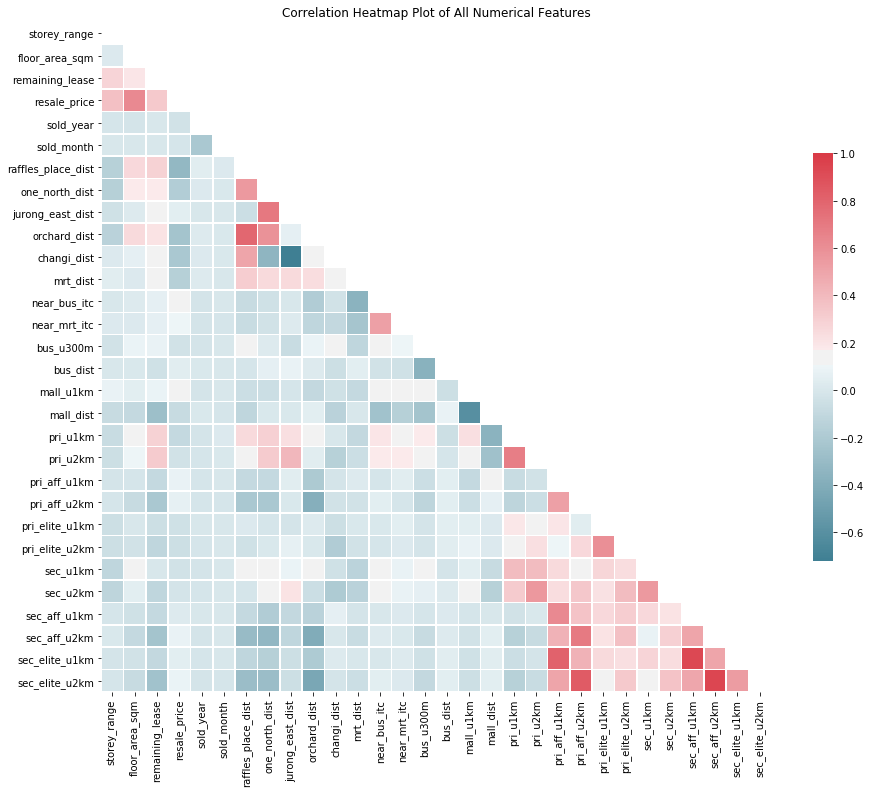

In [61]:
# Plotting correlation heatmap
corr = round(hdb.corr(),2)
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, square=True, annot=False, mask=mask, cmap=cmap, 
            linewidths=.5, cbar_kws={'shrink':0.5})
plt.title('Correlation Heatmap Plot of All Numerical Features')
plt.show()

In [62]:
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)

print("Collinear Columns to drop: ", correlated_features)

Collinear Columns to drop:  {'sec_elite_u1km', 'sec_elite_u2km'}


In [63]:
X = hdb.drop('resale_price', axis=1)
y = hdb['resale_price']

In [64]:
X.drop(correlated_features, axis=1, inplace=True)

In [65]:
X.drop(['raffles_place_dist', 'one_north_dist', 'jurong_east_dist', 'orchard_dist', 'changi_dist'], axis=1, inplace=True)

In [66]:
X.drop(['flat_type'], axis=1, inplace=True)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [71]:
len(X_train.columns)

23

In [72]:
X_train.columns

Index(['town', 'storey_range', 'floor_area_sqm', 'remaining_lease',
       'sold_year', 'sold_month', 'mrt_dist', 'near_bus_itc', 'near_mrt_itc',
       'bus_u300m', 'bus_dist', 'mall_u1km', 'mall_dist', 'pri_u1km',
       'pri_u2km', 'pri_aff_u1km', 'pri_aff_u2km', 'pri_elite_u1km',
       'pri_elite_u2km', 'sec_u1km', 'sec_u2km', 'sec_aff_u1km',
       'sec_aff_u2km'],
      dtype='object')

In [68]:
X_train_new = pd.get_dummies(X_train, drop_first=True)

In [69]:
X_test_new = pd.get_dummies(X_test, drop_first=True)

In [70]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_new)
X_test_sc = ss.transform(X_test_new)

In [207]:
joblib.dump(ss, './Deployment/scaler.pkl')

['./Deployment/scaler.pkl']

In [199]:
# selector = RFECV(LinearRegression(), n_jobs=-1, cv=10)

In [60]:
# selector.fit(X_train_sc, y_train)

In [61]:
# X_train_sc = selector.transform(X_train_sc)
# X_test_sc = selector.transform(X_test_sc)

## REGRESSION

In [24]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
cross_val_score(lr, X_train_sc, y_train, cv=10, n_jobs=-1)

array([0.8723561 , 0.88017166, 0.88203761, 0.8861458 , 0.89050023,
       0.88297853, 0.88300722, 0.87418712, 0.87236961, 0.87647924])

In [25]:
cross_val_score(lr, X_train_sc, y_train, cv=10, n_jobs=-1).mean()

0.8800233126128567

In [26]:
lr.score(X_test_sc, y_test)

0.8680778955165622

In [27]:
mean_squared_error(y_test, lr.predict(X_test_sc), squared=False)

54587.751089646445

In [28]:
mean_absolute_error(y_test, lr.predict(X_test_sc))

40985.03000594887

In [29]:
mean_absolute_error(y_test, lr.predict(X_test_sc)) / hdb.resale_price.mean()

0.0934879610149181

## LASSO

In [30]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=np.linspace(0.1, 20, 40), random_state=42, n_jobs=-1, max_iter=100_000)
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=array([ 0.1       ,  0.61025641,  1.12051282,  1.63076923,  2.14102564,
        2.65128205,  3.16153846,  3.67179487,  4.18205128,  4.69230769,
        5.2025641 ,  5.71282051,  6.22307692,  6.73333333,  7.24358974,
        7.75384615,  8.26410256,  8.77435897,  9.28461538,  9.79487179,
       10.30512821, 10.81538462, 11.32564103, 11.83589744, 12.34615385,
       12.85641026, 13.36666667, 13.87692308, 14.38717949, 14.8974359 ,
       15.40769231, 15.91794872, 16.42820513, 16.93846154, 17.44871795,
       17.95897436, 18.46923077, 18.97948718, 19.48974359, 20.        ]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=100000,
        n_alphas=100, n_jobs=-1, normalize=False, positive=False,
        precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
        verbose=False)

In [31]:
cross_val_score(lasso, X_train_sc, y_train)

array([0.87473117, 0.8837107 , 0.8866885 , 0.87860608, 0.87330765])

In [32]:
lasso.score(X_test_sc, y_test)

0.8681058215514962

In [33]:
lasso.alpha_

19.48974358974359

In [34]:
mean_squared_error(y_test, lasso.predict(X_test_sc), squared=False)

54581.97305823584

In [35]:
mean_absolute_error(y_test, lasso.predict(X_test_sc))

40967.72239919619

In [36]:
pd.set_option('max_rows', 999)

In [118]:
pd.Series(lasso.coef_, X_train_new.columns).sort_values()

town_WOODLANDS          -45277.401424
town_CHOA CHU KANG      -41509.778395
town_SEMBAWANG          -33419.329665
town_JURONG WEST        -33138.245114
mrt_dist                -27623.541235
town_BUKIT PANJANG      -24851.484816
pri_u2km                -24257.141613
town_SENGKANG           -23887.699877
town_YISHUN             -21326.293338
town_PUNGGOL            -18265.826777
town_BUKIT BATOK        -16741.509450
town_PASIR RIS          -16729.457810
town_HOUGANG            -13124.810254
town_TAMPINES           -10260.657131
pri_u1km                 -9960.454672
town_JURONG EAST         -9415.128993
sec_aff_u2km             -7793.167375
mall_dist                -6310.208900
town_BEDOK               -3445.926974
pri_elite_u1km            -854.990500
sec_u1km                  -820.286372
pri_aff_u1km              -501.711225
sold_year                 -385.003069
bus_u300m                 -251.548702
bus_dist                   -34.782517
pri_aff_u2km                39.578126
sold_month  

In [147]:
import joblib

In [149]:
joblib.__version__

'0.14.1'

In [151]:
import sklearn

In [152]:
sklearn.__version__

'0.22.1'

In [148]:
joblib.dump(lasso, './Deployment/lasso.pkl')

['./Deployment/lasso.pkl']

In [126]:
X.columns

Index(['town', 'storey_range', 'floor_area_sqm', 'remaining_lease',
       'sold_year', 'sold_month', 'mrt_dist', 'near_bus_itc', 'near_mrt_itc',
       'bus_u300m', 'bus_dist', 'mall_u1km', 'mall_dist', 'pri_u1km',
       'pri_u2km', 'pri_aff_u1km', 'pri_aff_u2km', 'pri_elite_u1km',
       'pri_elite_u2km', 'sec_u1km', 'sec_u2km', 'sec_aff_u1km',
       'sec_aff_u2km'],
      dtype='object')

## CART

In [ ]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_params = {
    'n_estimators': [],
    'max_depth': [],
    'min_samples_split': []
}